## FT084 - Introdução a Mineração de Dados
---
### Tarefa 04: Regressão Múltipla  

Este código tem por objetivo a resolução de uma das etapas da tarefa em questão, que consiste na implementação de um algoritmo de regressão múltipla, analisando algumas medidas e selecionando os melhores atributos.  
Instruções para o experimento:
1. Encontrar o melhor conjunto de atributos. Qual é o melhor modelo de acordo com as medidas Cp, BIC, and R2 ajustado? Mostre gráficos para dar suporte a sua resposta e mostre os coeficientes do melhor modelo.
2. Repita o procedimento em (1), usando seleção progressiva e seleção regressiva. Como sua resposta agora se compara aos resultados do item (a)?
3. Realize a seleção de variáveis e de modelos usando validação cruzada no conjunto de treino.
4. Compare os modelos obtidos nos items (1), (2) e (3) no conjunto de teste. Qual deles é o melhor?

---

#### 1) Importação das bibliotecas  
Serão utilizados alguns pacotes para a implementação do código. São eles:
- pandas: leitura dos arquivos
- numpy, scipy: cálculo de algumas estatísticas
- sklearn: modelo de regressão, separação dos dados entre treino e teste, transformação dos atributos categóricos para numéricos (caso necessário), matriz de confusão, avaliação do erro, validação cruzada, seleção de atributos
- statsmodels: modelo de regressão
- matplotly.pyplot e plotly: visualizações extras

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import time
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### 2) Criação do dataset
Será gerado um objeto do tipo dataframe com a base de dados boston.

In [2]:
X, y = load_boston(return_X_y=True)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.DataFrame(X, columns = columns[0:13]).astype('float64')
target = pd.DataFrame(y, columns = ['MEDV']).astype('float64')
target = target['MEDV']
dataset = pd.merge(data, target, left_index = True, right_index = True)

#### 3) Separação dos Dados
Aqui, os dados serão separados em treinamento e teste. O parâmetro *test_size* será definido primeiramente como 0.197 (19,7%) de acordo com o enunciado da tarefa.

In [49]:
# Divisão da base de dados entre treinamento e teste. Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.197, random_state = 0)

#### 4) Escolha do total de atributos
Será escrito um processo para, de forma iterativa, ir aumentando o número de atributos de 1 em 1 para analisar algumas métricas de cada modelo.

In [51]:
def processSubset(feature_set):
    # Criar um modelo para cada número de feature_set e encontrar o RSS
    model = sm.OLS(y_train,x_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(x_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [52]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(x_train.columns, k):
        results.append(processSubset(combo))
    
    # Colocando num datafram
    models = pd.DataFrame(results)
    
    # Escolhendo o modelo com o maior RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Retorna o melhor modelo com algumas informações extras
    return best_model

In [53]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,13):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 13 models on 1 predictors in 0.025907278060913086 seconds.
Processed 78 models on 2 predictors in 0.12816214561462402 seconds.
Processed 286 models on 3 predictors in 0.48589301109313965 seconds.
Processed 715 models on 4 predictors in 1.3499245643615723 seconds.
Processed 1287 models on 5 predictors in 2.634397268295288 seconds.
Processed 1716 models on 6 predictors in 3.4832825660705566 seconds.
Processed 1716 models on 7 predictors in 3.5441250801086426 seconds.
Processed 1287 models on 8 predictors in 2.6370198726654053 seconds.
Processed 715 models on 9 predictors in 1.4463527202606201 seconds.
Processed 286 models on 10 predictors in 0.5799648761749268 seconds.
Processed 78 models on 11 predictors in 0.15907979011535645 seconds.
Processed 13 models on 12 predictors in 0.026927947998046875 seconds.
Total elapsed time: 16.580823183059692 seconds.


In [55]:
# Imprimindo o dataframe com todos os melhores medelos para cada número de atributos
models_best

,RSS,model
1,23775.333267,<statsmodels.regression.linear_model.Regressio...
2,11659.109016,<statsmodels.regression.linear_model.Regressio...
3,10371.515257,<statsmodels.regression.linear_model.Regressio...
4,9642.805812,<statsmodels.regression.linear_model.Regressio...
5,9432.856050,<statsmodels.regression.linear_model.Regressio...
6,9268.303820,<statsmodels.regression.linear_model.Regressio...
7,9145.697994,<statsmodels.regression.linear_model.Regressio...
8,8977.857552,<statsmodels.regression.linear_model.Regressio...
9,8875.779570,<statsmodels.regression.linear_model.Regressio...
10,8803.727329,<statsmodels.regression.linear_model.Regressio...


In [8]:
print(models_best.loc[12, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              865.9
Date:                Wed, 12 May 2021   Prob (F-statistic):                   1.62e-273
Time:                        21:29:53   Log-Likelihood:                         -1194.7
No. Observations:                 404   AIC:                                      2413.
Df Residuals:                     392   BIC:                                      2461.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
print(getBest(12)["model"].summary())

Processed 13 models on 12 predictors in 0.02991938591003418 seconds.
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              865.9
Date:                Wed, 12 May 2021   Prob (F-statistic):                   1.62e-273
Time:                        21:29:53   Log-Likelihood:                         -1194.7
No. Observations:                 404   AIC:                                      2413.
Df Residuals:                     392   BIC:                                      2461.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

Text(0, 0.5, 'BIC')

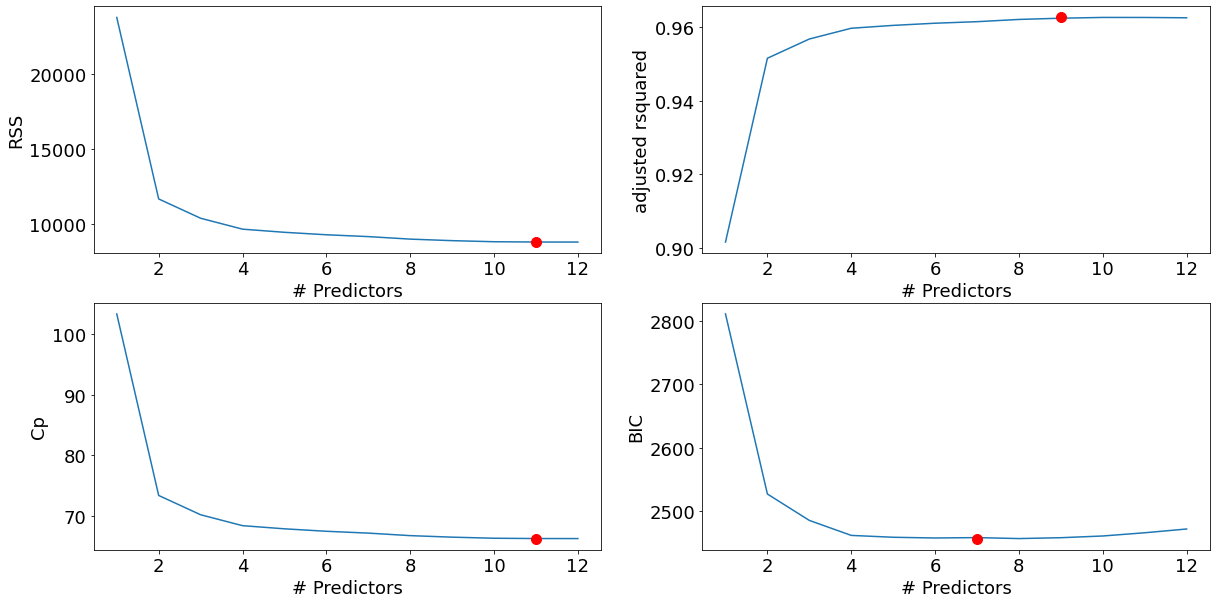

In [61]:
# Imprimindo 4 métricas para análise

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

plt.subplot(2, 2, 1)


plt.plot(models_best["RSS"])
plt.plot(models_best["RSS"].argmin(), models_best["RSS"].min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('RSS')


rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')


aic = models_best.apply(lambda row: row[1].aic, axis=1)
m = len(y_train)
p = 12
hat_sigma_squared = (1/(m - p -1)) * min(models_best["RSS"])
cp = (1/m) * (models_best["RSS"] + 2 * 406 * hat_sigma_squared )

plt.subplot(2, 2, 3)
plt.plot(cp)
plt.plot(cp.argmin(), cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

#### 5) Escolha do total de atributos com seleção progressiva e regressiva
Será escrito um processo para a seleção de atributos de acordo com as duas maneiras.

In [57]:
def forward(predictors):

    remaining_predictors = [p for p in x_train.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [58]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(x_train.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors in 0.025931596755981445 seconds.
Processed  12 models on 2 predictors in 0.022938013076782227 seconds.
Processed  11 models on 3 predictors in 0.025931119918823242 seconds.
Processed  10 models on 4 predictors in 0.019947052001953125 seconds.
Processed  9 models on 5 predictors in 0.01595759391784668 seconds.
Processed  8 models on 6 predictors in 0.014960289001464844 seconds.
Processed  7 models on 7 predictors in 0.012966394424438477 seconds.
Processed  6 models on 8 predictors in 0.010970830917358398 seconds.
Processed  5 models on 9 predictors in 0.009972810745239258 seconds.
Processed  4 models on 10 predictors in 0.007978677749633789 seconds.
Processed  3 models on 11 predictors in 0.0069811344146728516 seconds.
Processed  2 models on 12 predictors in 0.004986763000488281 seconds.
Processed  1 models on 13 predictors in 0.0029921531677246094 seconds.
Total elapsed time: 0.20844221115112305 seconds.


In [59]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    return best_model

In [15]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(x_train.columns)))

tic = time.time()
predictors = x_train.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 12 predictors in 0.02991962432861328 seconds.
Processed  12 models on 11 predictors in 0.025931119918823242 seconds.
Processed  11 models on 10 predictors in 0.023935794830322266 seconds.
Processed  10 models on 9 predictors in 0.021941661834716797 seconds.
Processed  9 models on 8 predictors in 0.018949270248413086 seconds.
Processed  8 models on 7 predictors in 0.015957355499267578 seconds.
Processed  7 models on 6 predictors in 0.014959573745727539 seconds.
Processed  6 models on 5 predictors in 0.011967658996582031 seconds.
Processed  5 models on 4 predictors in 0.013964176177978516 seconds.
Processed  4 models on 3 predictors in 0.016953706741333008 seconds.
Processed  3 models on 2 predictors in 0.009973764419555664 seconds.
Processed  2 models on 1 predictors in 0.005984306335449219 seconds.
Total elapsed time: 0.21741914749145508 seconds.


#### 6) Impressão dos Resultados
Imprimindo qual é o melhor conjunto de atributos de acordo com cada uma das técnicas

In [68]:
print("------------")
print("Melhor conjunto de atributos:")
print("------------")
print(models_best.loc[8, "model"].params)

------------
Melhor conjunto de atributos:
------------
CRIM      -0.119332
ZN         0.040026
CHAS       2.598726
RM         5.806024
DIS       -0.593451
PTRATIO   -0.635027
B          0.014117
LSTAT     -0.423435
dtype: float64


In [69]:
print("-----------------")
print("Seleção progressiva:")
print("-----------------")
print(models_fwd.loc[8, "model"].params)

-----------------
Seleção progressiva:
-----------------
RM         5.806024
LSTAT     -0.423435
PTRATIO   -0.635027
B          0.014117
CHAS       2.598726
CRIM      -0.119332
DIS       -0.593451
ZN         0.040026
dtype: float64


In [70]:
print("-------------------")
print("Seleção regressiva:")
print("-------------------")
print(models_bwd.loc[8, "model"].params)

-------------------
Seleção regressiva:
-------------------
CRIM      -0.119960
ZN         0.040604
CHAS       2.598873
RM         5.800148
DIS       -0.601618
PTRATIO   -0.631380
B          0.014119
LSTAT     -0.423829
dtype: float64


#### 7) Validação Cruzada
Seleção dos atributos e dos modelos

In [65]:
# Criação do modelo
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [66]:
# Validação cruzada para seleção de atributos
selector = RFECV(model, step=1, cv=12)
selector = selector.fit(x_train,y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True])

In [67]:
# Validação cruzada para seleção do modelo
cv_results = cross_validate(model, x_train, y_train, return_estimator = True)
cv_results

{'fit_time': array([0.00296736, 0.00299263, 0.00299191, 0.0019927 , 0.00199461]),
 'score_time': array([0.00099707, 0.00199461, 0.00199652, 0.00199413, 0.00099754]),
 'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()),
 'test_score': array([0.77374312, 0.69791896, 0.76359578, 0.68157902, 0.81979081])}